In [1]:
%load_ext autoreload
%autoreload 2

In [9]:
import numpy as np
import glob
from TTS.utils.audio import AudioProcessor
from TTS.config.shared_configs import BaseAudioConfig
from TTS.tts.utils.visual import plot_pitch

In [13]:
pitch_path = "/home/ubuntu/TTS/recipes/ljspeech/fast_pitch/f0_cache"
wav_path = "/home/ubuntu/TTS/recipes/ljspeech/LJSpeech-1.1/wavs"
wav_files = glob.glob("/home/ubuntu/TTS/recipes/ljspeech/LJSpeech-1.1/wavs/*.wav")
print(len(wav_files))

13100


In [20]:
ap = AudioProcessor(**BaseAudioConfig( sample_rate=22050,
    do_trim_silence=True,
    trim_db=60.0,
    signal_norm=False,
    mel_fmin=0.0,
    mel_fmax=8000,
    spec_gain=1.0,
    log_func="np.log",
    ref_level_db=20,
    preemphasis=0.0,))

 > Setting up Audio Processor...
 | > sample_rate:22050
 | > resample:False
 | > num_mels:80
 | > log_func:np.log
 | > min_level_db:-100
 | > frame_shift_ms:None
 | > frame_length_ms:None
 | > ref_level_db:20
 | > fft_size:1024
 | > power:1.5
 | > preemphasis:0.0
 | > griffin_lim_iters:60
 | > signal_norm:False
 | > symmetric_norm:True
 | > mel_fmin:0
 | > mel_fmax:8000
 | > spec_gain:1.0
 | > stft_pad_mode:reflect
 | > max_norm:4.0
 | > clip_norm:True
 | > do_trim_silence:True
 | > trim_db:60.0
 | > do_sound_norm:False
 | > do_amp_to_db_linear:True
 | > do_amp_to_db_mel:True
 | > stats_path:None
 | > base:2.718281828459045
 | > hop_length:256
 | > win_length:1024


In [15]:
pitch_files = [wf.replace(".wav", "_pitch.npy").replace(wav_path, pitch_path) for wf in wav_files]

In [30]:
idx = 100
# wav_file = wav_files[idx]
# pitch_file = pitch_files[idx]
wav_file = "/home/ubuntu/TTS/recipes/ljspeech/fast_pitch/../LJSpeech-1.1/wavs/LJ011-0097.wav"
pitch_file = "/home/ubuntu/TTS/recipes/ljspeech/fast_pitch/f0_cache/LJ011-0097_pitch.npy"
pitch = np.load(pitch_file)
wav = ap.load_wav(wav_file)
spec = ap.melspectrogram(wav)

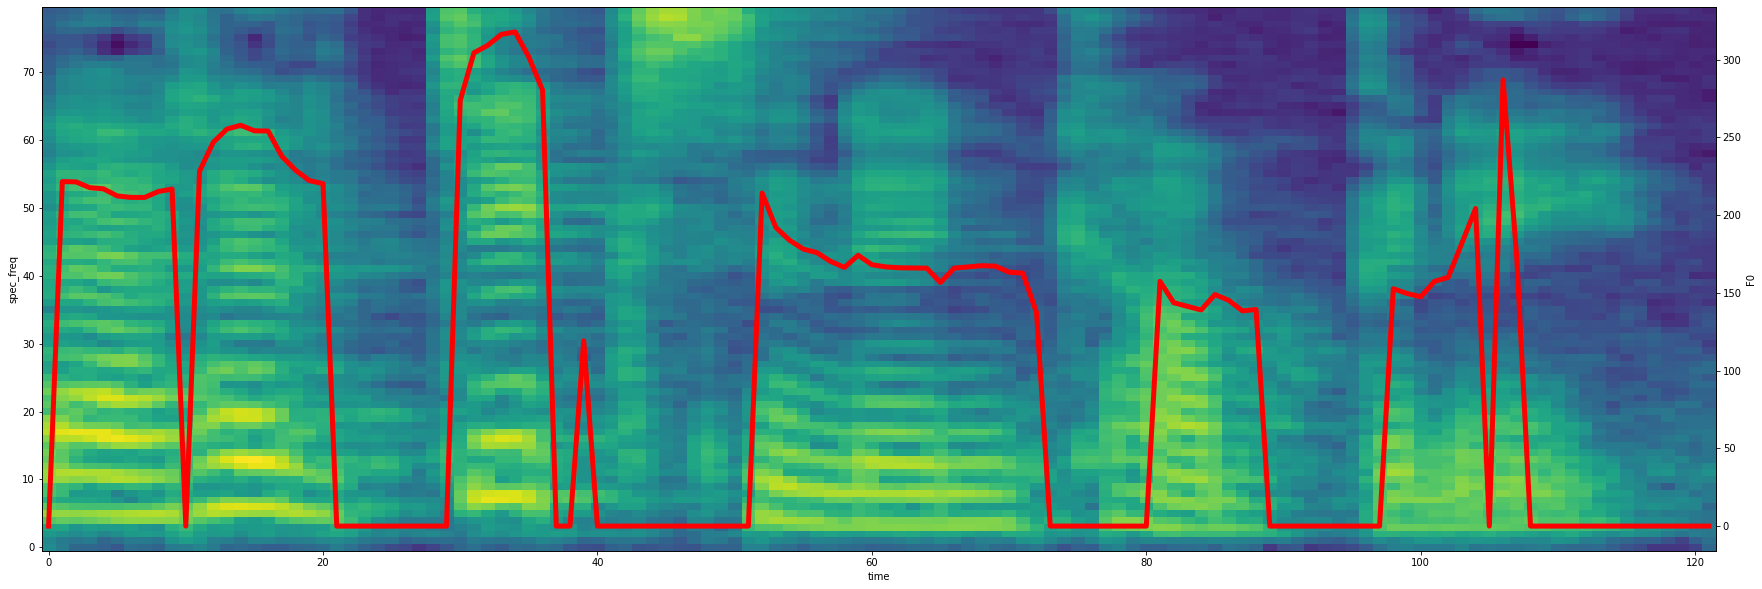

In [31]:
plot_pitch(pitch, spec.T)